<a href="https://colab.research.google.com/github/RainDeath29/PracticeWork/blob/main/PracticeWork3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

X_data = np.array([[ 0], [ 1], [ 2], [ 3], [ 4], [ 5], [ 6], [ 7],
                   [ 8], [ 9], [10], [11], [12], [13], [14], [15],
                   [16], [17], [18], [19]])

y_data = np.array([  498.71415301,  -132.26430117,   659.6885381 ,  1543.02985641,
        -204.15337472,  -192.13695695,  1635.21281551,   839.43472915,
        -379.47438593,   652.56004359,  -331.41769281,  -309.72975357,
         423.96227157, -1703.28024466, -1484.91783251,  -290.28752924,
        -706.83112033,   656.2473326 ,  -528.02407552,  -992.30370134])

pipe_poly = make_pipeline(PolynomialFeatures(), LinearRegression())

param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4]}

grid_poly = GridSearchCV(pipe_poly, param_grid=param_grid, cv=5, scoring='r2')

grid_poly.fit(X_data, y_data)

print("--- Результати пошуку для поліноміальної моделі ---")
print(f"Найкращий степінь полінома: {grid_poly.best_params_['polynomialfeatures__degree']}")
print(f"Найкраща середня оцінка (R^2): {grid_poly.best_score_:.4f}")

results_df = pd.DataFrame(grid_poly.cv_results_)
print("\nДетальні результати для кожного степеня:")
print(results_df[['param_polynomialfeatures__degree', 'mean_test_score', 'std_test_score']])

--- Результати пошуку для поліноміальної моделі ---
Найкращий степінь полінома: 1
Найкраща середня оцінка (R^2): -0.3579

Детальні результати для кожного степеня:
   param_polynomialfeatures__degree  mean_test_score  std_test_score
0                                 1        -0.357897        0.245240
1                                 2        -1.761646        2.663807
2                                 3        -2.039635        3.131760
3                                 4       -59.048934      103.156224


In [14]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X_data = np.array([[ 0], [ 1], [ 2], [ 3], [ 4], [ 5], [ 6], [ 7],
                   [ 8], [ 9], [10], [11], [12], [13], [14], [15],
                   [16], [17], [18], [19]])

y_data = np.array([  498.71415301,  -132.26430117,   659.6885381 ,  1543.02985641,
        -204.15337472,  -192.13695695,  1635.21281551,   839.43472915,
        -379.47438593,   652.56004359,  -331.41769281,  -309.72975357,
         423.96227157, -1703.28024466, -1484.91783251,  -290.28752924,
        -706.83112033,   656.2473326 ,  -528.02407552,  -992.30370134])

best_poly_model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
best_poly_model.fit(X_data, y_data)

final_linear_regressor = best_poly_model.named_steps['linearregression']

b = final_linear_regressor.intercept_
k = final_linear_regressor.coef_[1]

r2_score = best_poly_model.score(X_data, y_data)

print("--- Деталі для найкращої поліноміальної моделі (Степінь 1) ---")
print(f"Рівняння моделі: y = {k:.4f} * x + {b:.4f}")
print(f"Коефіцієнт k (нахил): {k:.4f}")
print(f"Вільний член b (зсув): {b:.4f}")
print(f"Коефіцієнт детермінації (R^2) на всіх даних: {r2_score:.4f}")

--- Деталі для найкращої поліноміальної моделі (Степінь 1) ---
Рівняння моделі: y = -77.5648 * x + 719.5666
Коефіцієнт k (нахил): -77.5648
Вільний член b (зсув): 719.5666
Коефіцієнт детермінації (R^2) на всіх даних: 0.2690


In [15]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

X_data = np.array([[ 0], [ 1], [ 2], [ 3], [ 4], [ 5], [ 6], [ 7],
                   [ 8], [ 9], [10], [11], [12], [13], [14], [15],
                   [16], [17], [18], [19]])

y_data = np.array([  498.71415301,  -132.26430117,   659.6885381 ,  1543.02985641,
        -204.15337472,  -192.13695695,  1635.21281551,   839.43472915,
        -379.47438593,   652.56004359,  -331.41769281,  -309.72975357,
         423.96227157, -1703.28024466, -1484.91783251,  -290.28752924,
        -706.83112033,   656.2473326 ,  -528.02407552,  -992.30370134])

pipe_mlp = make_pipeline(StandardScaler(), MLPRegressor(random_state=42, max_iter=3000))

param_grid_mlp = {
    'mlpregressor__hidden_layer_sizes': [
        (10,), (20,),
        (10, 5), (20, 10),
        (10, 10, 10)
    ]
}

grid_mlp = GridSearchCV(pipe_mlp, param_grid=param_grid_mlp, cv=5, scoring='r2')
grid_mlp.fit(X_data, y_data)

print("--- Результати пошуку для MLP моделі ---")
print(f"Найкраща архітектура: {grid_mlp.best_params_['mlpregressor__hidden_layer_sizes']}")
print(f"Найкраща середня оцінка (R^2): {grid_mlp.best_score_:.4f}")

results_mlp_df = pd.DataFrame(grid_mlp.cv_results_)
print("\nДетальні результати для кожної архітектури:")
print(results_mlp_df[['param_mlpregressor__hidden_layer_sizes', 'mean_test_score', 'std_test_score']])

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perce

--- Результати пошуку для MLP моделі ---
Найкраща архітектура: (10, 5)
Найкраща середня оцінка (R^2): -0.2227

Детальні результати для кожної архітектури:
  param_mlpregressor__hidden_layer_sizes  mean_test_score  std_test_score
0                                  (10,)        -0.410935        0.362255
1                                  (20,)        -0.312038        0.254134
2                                (10, 5)        -0.222665        0.135493
3                               (20, 10)        -0.472570        0.542013
4                           (10, 10, 10)        -1.782679        1.698267


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


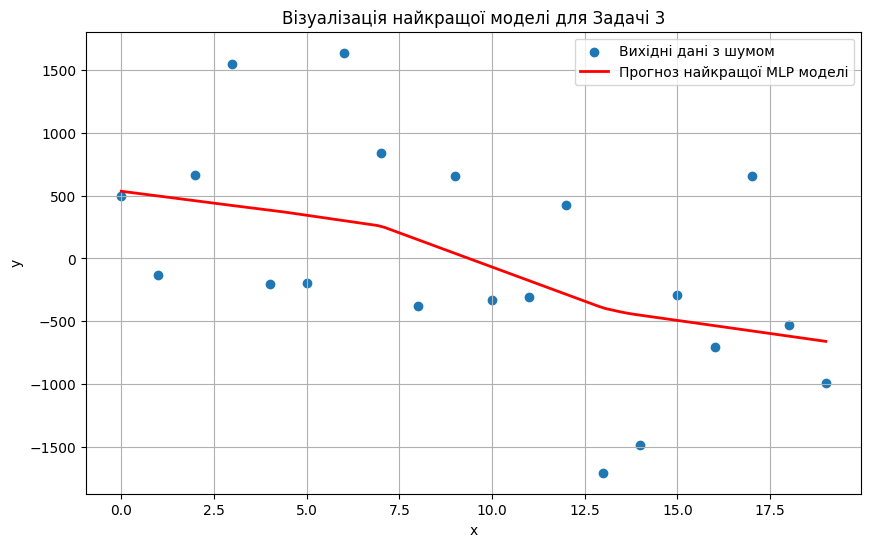

Прогноз моделі для точки x=10.5: y=-122.54


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

X_data = np.array([[ 0], [ 1], [ 2], [ 3], [ 4], [ 5], [ 6], [ 7],
                   [ 8], [ 9], [10], [11], [12], [13], [14], [15],
                   [16], [17], [18], [19]])

y_data = np.array([  498.71415301,  -132.26430117,   659.6885381 ,  1543.02985641,
        -204.15337472,  -192.13695695,  1635.21281551,   839.43472915,
        -379.47438593,   652.56004359,  -331.41769281,  -309.72975357,
         423.96227157, -1703.28024466, -1484.91783251,  -290.28752924,
        -706.83112033,   656.2473326 ,  -528.02407552,  -992.30370134])

best_mlp_model = make_pipeline(
    StandardScaler(),
    MLPRegressor(hidden_layer_sizes=(10, 5), random_state=42, max_iter=3000)
)
best_mlp_model.fit(X_data, y_data)

X_plot = np.linspace(X_data.min(), X_data.max(), 100).reshape(-1, 1)
y_plot = best_mlp_model.predict(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X_data, y_data, label='Вихідні дані з шумом')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Прогноз найкращої MLP моделі')
plt.title('Візуалізація найкращої моделі для Задачі 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

x_new = np.array([[10.5]])
y_new = best_mlp_model.predict(x_new)
print(f"Прогноз моделі для точки x={x_new[0][0]}: y={y_new[0]:.2f}")

## Висновки по Задачі 3

В результаті аналізу було порівняно поліноміальні моделі та моделі на основі MLP.

* Найкраща поліноміальна модель: **Степінь 1**, R² = **-0.3579**
* Найкраща MLP модель: **Архітектура (10, 5)**, R² = **-0.2227**

**Загальний висновок:** Найкращою моделлю для даного набору даних є MLP з архітектурою (10, 5), оскільки вона має вищу (менш негативну) оцінку R².